<a href="https://colab.research.google.com/github/gabrielcarcedo/Deep-Learning-en-vision-computacional-9-Escuela-de-Invierno/blob/main/Filtros_9%C2%B0_Escuela_de_Invierno_IIMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9ª Escuela de Invierno en Ciencia de Datos y Sistemas Complejos**
---
## Taller: Deep learning en visión computacional
---
<table>
  <tr>
      <h4><b>ISC. Gabriel Carcedo Rodríguez</b>: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Ing. Ismael Pérez Ruiz</b>: <a href= "mailto:iperez@modelo.edu.mx">iperez@modelo.edu.mx</a>
      <br>
      <br>
      <b>LCC. Victoria May Balam</b>: <a href= "mailto:victoria.mbalam@comunidad.unam.mx">victoria.mbalam@comunidad.unam.mx</a>
      <br>
      <br>
      <b>Dra. Nidiyare Hevia Montiel</b>: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a> </h4>
  </tr>
  <tr>
    <td width="60%" valign="top">
      <br>
      <br>
      <a href="https://www.pcic.unam.mx/">Posgrado en Ciencia e Ingeniería de la Computación</a>
    </td>
    <td width="40%" valign="top" style="text-align: center;">
      <a href="https://www.pcic.unam.mx/">
        <img src="https://pcic.posgrado.unam.mx/wp-content/uploads/Ciencia-e-Ingenieria-de-la-Computacion_color.png" alt="PCIC" style="width:100%; height:auto;">
      </a>
    </td>
  </tr>
</table>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Carga de la imagen

In [ ]:
ruta_imagen = '/content/drive/MyDrive/michael.jpg'

In [ ]:
img=cv2.imread(ruta_imagen)

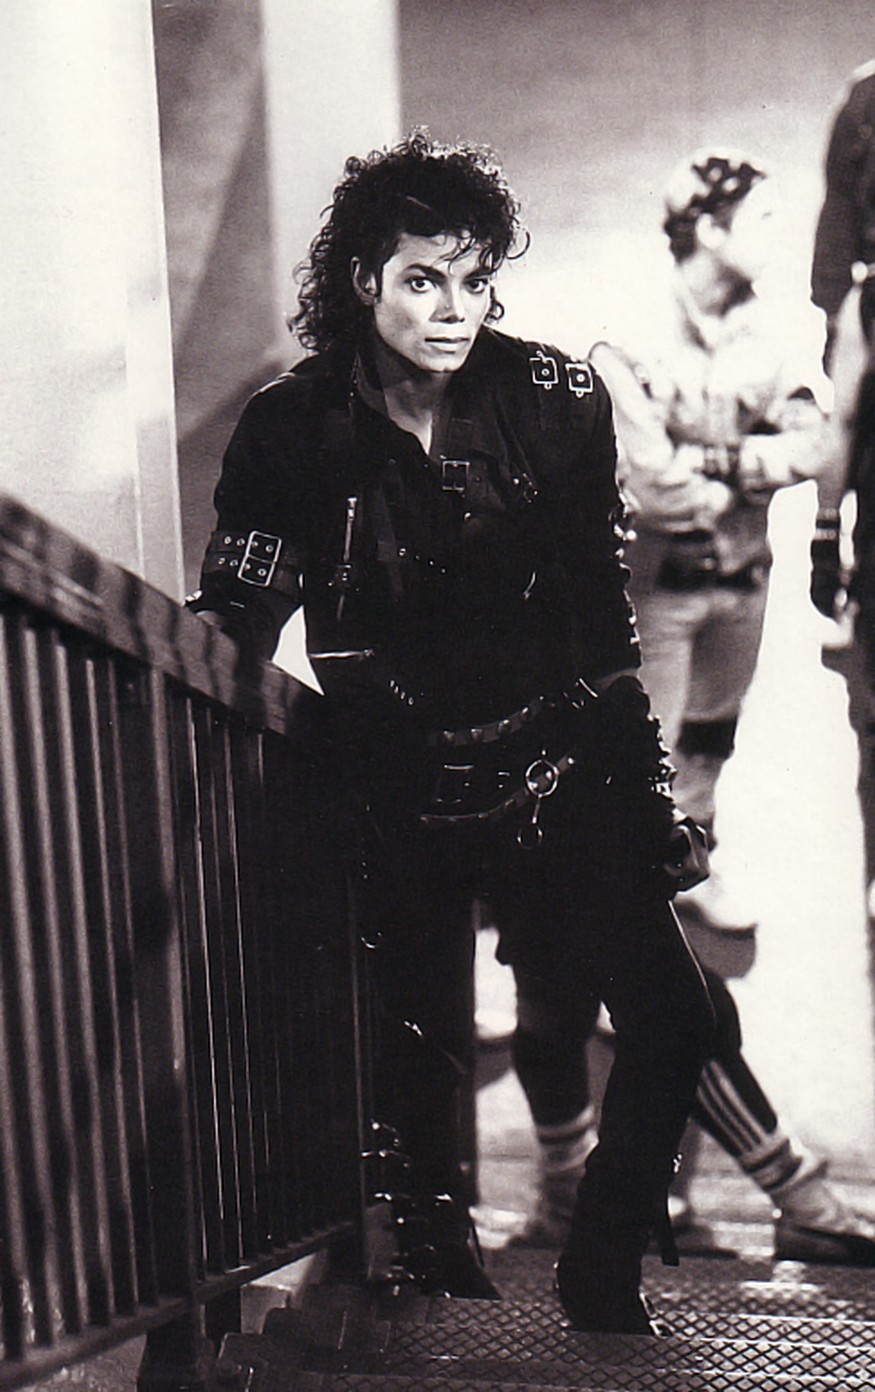

In [ ]:
cv2_imshow(img)

# Preprocesamiento.
La imagen BGR se convierte a escala de grises

In [ ]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

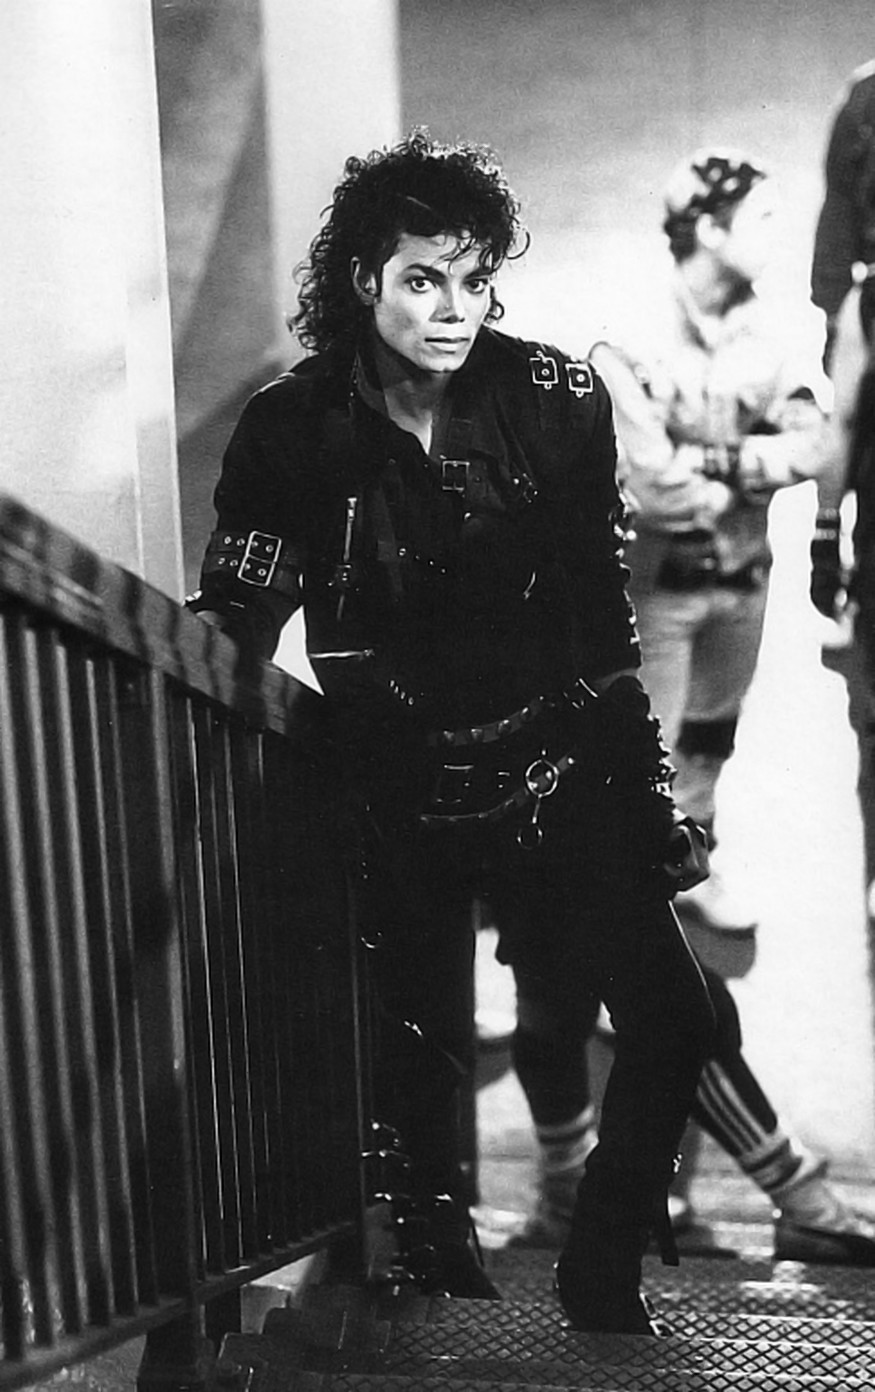

In [ ]:
cv2_imshow(img_gray)

# Definición de filtros
Se definen tres filtros:

Filtro de detección de bordes verticales: Este filtro (conocido comúnmente como Sobel Vertical) busca diferencias bruscas de color al moverse horizontalmente.

Filtro de detección de bordes horizontales: Compara los "pies" del píxel con su "cabeza". Si el color cambia drásticamente al bajar (ej. del cielo al horizonte), el filtro se activa.

Filtro de enfoque: Filtro que busca contrastes. Exagera la diferencia entre el píxel central y sus vecinos.

In [ ]:
#Filtro sobel para bordes verticales
kernel_edge_v = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype=np.float32)

#Filtro de bordes horizontales
kernel_edge_h = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

#Filtro de enfoque
kernel_sharpen = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)

In [ ]:
filtros = [
        ("Bordes Verticales", kernel_edge_v),
        ("Bordes Horizontales", kernel_edge_h),
        ("Enfoque / Sharpen", kernel_sharpen)
    ]

In [ ]:
mapas=[]

# Aplicación de filtros

In [ ]:
for nombre, kernel in filtros:
  img_filtrada = cv2.filter2D(img_gray, ddepth=cv2.CV_32F, kernel=kernel)
  mapas.append((nombre,img_filtrada))

In [ ]:
bordes_v = mapas[0][1]
bordes_h = mapas[1][1]


# Visualización de resultados.

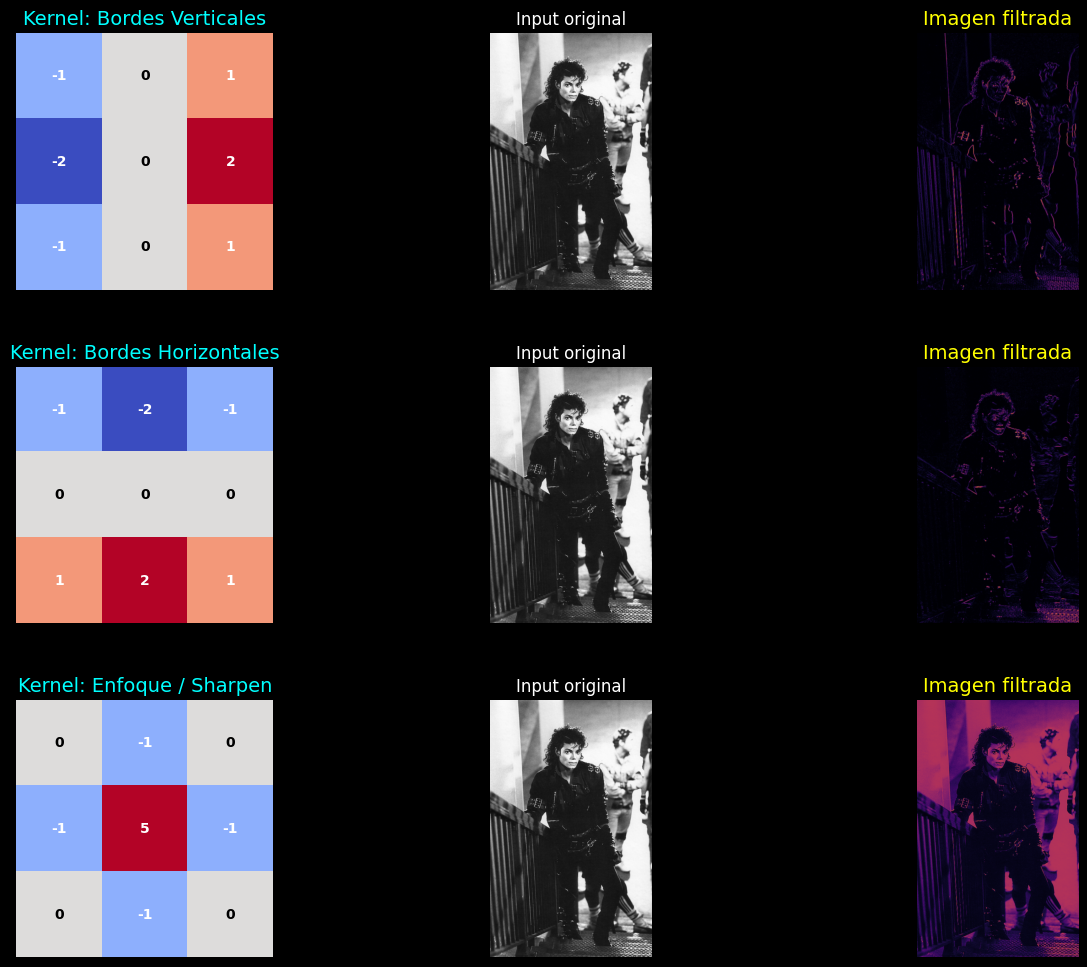

In [ ]:

fig1, axes = plt.subplots(len(filtros), 3, figsize=(16, 4*len(filtros)))
plt.subplots_adjust(hspace=0.3, wspace=0.1)

for i, (nombre, kernel) in enumerate(filtros):

  ax_k = axes[i, 0]
  ax_k.imshow(kernel, cmap='coolwarm', vmin=-2, vmax=2)
  ax_k.set_title(f"Kernel: {nombre}", color='cyan', fontsize=14)
  for (j, k_val), val in np.ndenumerate(kernel):
      ax_k.text(k_val, j, f"{int(val)}", ha='center', va='center', fontweight='bold',
                color='white' if abs(val) > 0.5 else 'black')
  ax_k.axis('off')

  ax_orig = axes[i, 1]

  ax_orig.imshow(img_gray, cmap='gray')
  ax_orig.set_title("Input original", color='white')
  ax_orig.axis('off')

  ax_res = axes[i, 2]

  ax_res.imshow(np.abs(mapas[i][1]), cmap='inferno')
  ax_res.set_title(f"Imagen filtrada", color='yellow', fontsize=14)
  ax_res.axis('off')